In [1]:
import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt # For drawing
%matplotlib inline
from networkx.algorithms import bipartite

# 1. Pre-processing

## 1.1 Load the data

In [49]:
data = pd.read_csv('CosciaRios2012_DataBase.csv',sep=',')
data.head(2)

,Code,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
0,1001,1,1990,0,0,0,0,0,0,0,0,0,0
1,1001,1,1991,0,0,0,0,0,0,0,0,0,0


In [50]:
geodata = pd.read_csv('mx_data.csv',sep=',')
geodata.head(10)

,cv_estado,cv_municipio,estado,municipio,tortillerias,population,brute_production
0,1,1,AGUASCALIENTES,AGUASCALIENTES,365,797010,103475027
1,1,2,AGUASCALIENTES,ASIENTOS,16,45492,100895
2,1,3,AGUASCALIENTES,CALVILLO,25,54136,586127
3,1,4,AGUASCALIENTES,COSÍO,8,15042,49793
4,1,5,AGUASCALIENTES,JESÚS MARÍA,50,99590,12224421
5,1,6,AGUASCALIENTES,PABELLÓN DE ARTEAGA,29,41862,768351
6,1,7,AGUASCALIENTES,RINCÓN DE ROMOS,36,49156,1626840
7,1,8,AGUASCALIENTES,SAN JOSÉ DE GRACIA,5,8443,55868
8,1,9,AGUASCALIENTES,TEPEZALÁ,10,19668,1477156
9,1,10,AGUASCALIENTES,EL LLANO,6,18828,56348


## 1.2 Pre-processing (merging dataframe)

In [51]:
data['Code']= data['Code'].astype(str)

for i in range(0,len(data.index)):
    if(len(data.iloc[i,0]) <5):
        data.iloc[i,0] = '0'+data.iloc[i,0]
        
data.head(10)

,Code,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros
0,01001,1,1990,0,0,0,0,0,0,0,0,0,0
1,01001,1,1991,0,0,0,0,0,0,0,0,0,0
2,01001,1,1992,0,0,0,0,0,0,0,0,0,0
3,01001,1,1993,0,0,0,0,0,0,0,0,0,0
4,01001,1,1994,0,0,0,0,0,0,0,0,0,0
5,01001,1,1995,0,0,0,0,0,0,0,0,0,0
6,01001,1,1996,0,0,0,0,0,0,0,0,0,0
7,01001,1,1997,0,0,0,0,0,1,0,0,0,0
8,01001,1,1998,0,0,0,0,0,0,0,0,0,0
9,01001,1,1999,0,0,0,0,0,0,0,0,0,0


# ----------

In [52]:
geodata['cv_estado']= geodata['cv_estado'].astype(str)
geodata['cv_municipio']= geodata['cv_municipio'].astype(str)
geodata['municipio']= geodata['municipio'].astype(str)


for i in range(0,len(geodata.index)):
    if(len(geodata.iloc[i,0]) <2):
        geodata.iloc[i,0] = '0'+geodata.iloc[i,0]
    if(len(geodata.iloc[i,1]) ==1):
        geodata.iloc[i,1] = '00'+geodata.iloc[i,1]
    if(len(geodata.iloc[i,1]) ==2):
        geodata.iloc[i,1] = '0'+geodata.iloc[i,1]
        
geodata.head(10)

,cv_estado,cv_municipio,estado,municipio,tortillerias,population,brute_production
0,01,001,AGUASCALIENTES,AGUASCALIENTES,365,797010,103475027
1,01,002,AGUASCALIENTES,ASIENTOS,16,45492,100895
2,01,003,AGUASCALIENTES,CALVILLO,25,54136,586127
3,01,004,AGUASCALIENTES,COSÍO,8,15042,49793
4,01,005,AGUASCALIENTES,JESÚS MARÍA,50,99590,12224421
5,01,006,AGUASCALIENTES,PABELLÓN DE ARTEAGA,29,41862,768351
6,01,007,AGUASCALIENTES,RINCÓN DE ROMOS,36,49156,1626840
7,01,008,AGUASCALIENTES,SAN JOSÉ DE GRACIA,5,8443,55868
8,01,009,AGUASCALIENTES,TEPEZALÁ,10,19668,1477156
9,01,010,AGUASCALIENTES,EL LLANO,6,18828,56348


In [53]:
geodata['Code'] =  geodata['cv_estado']+ geodata['cv_municipio']
geodata.drop('cv_estado', 1, inplace=True)
geodata.drop('cv_municipio', 1, inplace=True)
geodata.head(10)

,estado,municipio,tortillerias,population,brute_production,Code
0,AGUASCALIENTES,AGUASCALIENTES,365,797010,103475027,01001
1,AGUASCALIENTES,ASIENTOS,16,45492,100895,01002
2,AGUASCALIENTES,CALVILLO,25,54136,586127,01003
3,AGUASCALIENTES,COSÍO,8,15042,49793,01004
4,AGUASCALIENTES,JESÚS MARÍA,50,99590,12224421,01005
5,AGUASCALIENTES,PABELLÓN DE ARTEAGA,29,41862,768351,01006
6,AGUASCALIENTES,RINCÓN DE ROMOS,36,49156,1626840,01007
7,AGUASCALIENTES,SAN JOSÉ DE GRACIA,5,8443,55868,01008
8,AGUASCALIENTES,TEPEZALÁ,10,19668,1477156,01009
9,AGUASCALIENTES,EL LLANO,6,18828,56348,01010


#### Join the two tables

In [54]:
data = data.join(geodata.set_index('Code'), on='Code')

In [55]:
data.head()

,Code,State,Year,Beltran_Leyva,Beltran_Leyva_Family,Familia,Golfo,Juarez,Sinaloa,Sinaloa_Family,Tijuana,Zetas,Otros,estado,municipio,tortillerias,population,brute_production
0,01001,1,1990,0,0,0,0,0,0,0,0,0,0,AGUASCALIENTES,AGUASCALIENTES,365,797010,103475027
1,01001,1,1991,0,0,0,0,0,0,0,0,0,0,AGUASCALIENTES,AGUASCALIENTES,365,797010,103475027
2,01001,1,1992,0,0,0,0,0,0,0,0,0,0,AGUASCALIENTES,AGUASCALIENTES,365,797010,103475027
3,01001,1,1993,0,0,0,0,0,0,0,0,0,0,AGUASCALIENTES,AGUASCALIENTES,365,797010,103475027
4,01001,1,1994,0,0,0,0,0,0,0,0,0,0,AGUASCALIENTES,AGUASCALIENTES,365,797010,103475027


# 2. First analysis (graphs + summary table)

## 2.1 Active and competitive municipalities

In [56]:
dto = ['Beltran_Leyva','Beltran_Leyva_Family','Familia','Golfo','Juarez','Sinaloa','Sinaloa_Family','Tijuana',
      'Zetas','Otros']

In [57]:
act_mun = []
comp_mun = []

for i in set(data['Year']):
    mun = data.loc[(data['Year']==i)].groupby(by=data.loc[(data['Year']==i)]['Code']).sum()[dto]
    mun_sum = np.sum(mun,axis=1)
    exec('act_mun_'+str(i)+'= mun_sum.iloc[np.where(mun_sum >= 1)[0]].index')
    exec('comp_mun_'+str(i)+'= mun_sum.iloc[np.where(mun_sum >= 2)[0]].index')
    act_mun.append(mun_sum.iloc[np.where(mun_sum >= 1)[0]].sum())
    comp_mun.append(mun_sum.iloc[np.where(mun_sum >= 2)[0]].sum())

In [58]:
act_mun=pd.DataFrame([list(set(data['Year'])),act_mun]).T
act_mun.columns=['Year','Nb_mun']

comp_mun=pd.DataFrame([list(set(data['Year'])),comp_mun]).T
comp_mun.columns=['Year','Nb_mun']

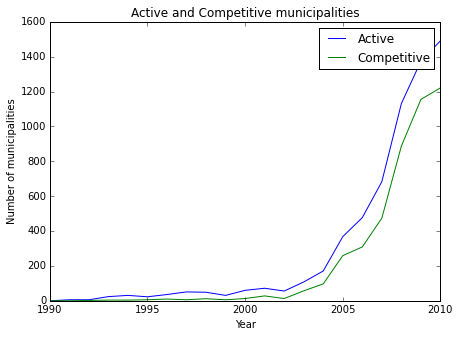

In [59]:
plt.figure(figsize=[7,5])
plt.plot(act_mun['Year'],act_mun['Nb_mun'])
plt.plot(comp_mun['Year'],comp_mun['Nb_mun'])
plt.xlabel('Year')
plt.ylabel('Number of municipalities')
plt.title('Active and Competitive municipalities')
plt.legend(['Active','Competitive'])
plt.show()

## 2.2 Activity patterns per trafficker

In [60]:
for org in dto :
    exec('act_mun_'+org+'= []')
    for i in set(data['Year']):
        # mun = dataframe where columns = dto, rows = municipalities (code) and inside = sum
        mun = data.loc[(data['Year']==i)].groupby(by=data.loc[(data['Year']==i)]['Code']).sum()[dto]
        mun_dto = mun[org]
        exec('act_mun_'+org+'.append(mun_dto.iloc[np.where(mun_dto >= 1)[0]].sum())')
        
    exec('act_mun_'+org+'= pd.DataFrame([list(set(data["Year"])),act_mun_'+org+']).T')
    exec('act_mun_'+org+'.columns=["Year","Nb_mun"]')

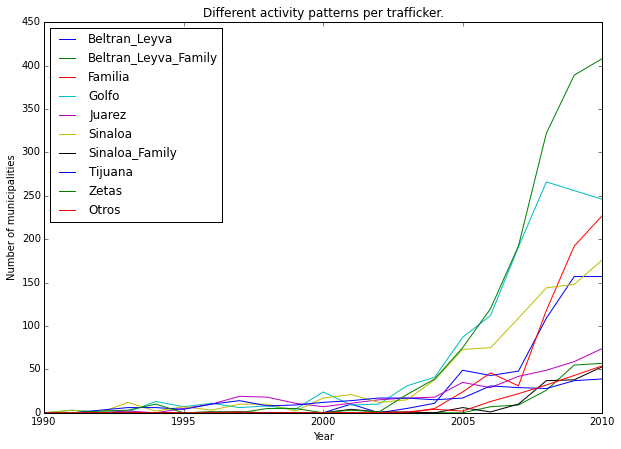

In [61]:
plt.figure(figsize=[10,7])
for org in dto:
    exec('plt.plot(act_mun_'+org+'["Year"],act_mun_'+org+'["Nb_mun"])')

plt.xlabel('Year')
plt.ylabel('Number of municipalities')
plt.title('Different activity patterns per trafficker.')
plt.legend(dto,loc=2)
plt.show()

## 2.3 Summary table

In [62]:
for org in dto :
    exec('act_mun_'+org+'= []')
    for i in set(data['Year']):
        # mun = dataframe where columns = dto, rows = municipalities (code) and inside = sum
        mun = data.loc[(data['Year']==i)].groupby(by=data.loc[(data['Year']==i)]['Code']).sum()[dto]
        mun_dto = mun[org]
        exec('act_mun_'+org+'.append(mun_dto.iloc[np.where(mun_dto >= 1)[0]].sum())')
        
    exec('act_mun_'+org+'= pd.DataFrame([list(set(data["Year"])),act_mun_'+org+']).T')
    exec('act_mun_'+org+'.columns=["Year","Nb_mun"]')

In [63]:
table = pd.DataFrame(dto,columns=['Drug Traffic Organization'])

### 2.3.1 Number of territories in 2010

In [64]:
ter_2010 = []
for org in dto:
    exec('ter_2010.append(act_mun_'+org+'.loc[act_mun_'+org+'["Year"]==2010,"Nb_mun"].values[0])')

In [65]:
table['2010 Territories']=ter_2010

### 2.3.2 Number of territories in the start year

In [66]:
ter_start_year = []
for org in dto:
    exec('start_year = act_mun_'+org+'.loc[act_mun_'+org+'["Nb_mun"]>0]["Year"].values[0]')
    exec('ter_start_year.append(act_mun_'+org+'.loc[act_mun_'+org+'["Year"]==start_year,"Nb_mun"].values[0])')

In [67]:
table['Start Year Territories']=ter_start_year

### 2.3.3 Start year

In [68]:
start_year = []
for org in dto:
    exec('start_year.append(act_mun_'+org+'.loc[act_mun_'+org+'["Nb_mun"]>0]["Year"].values[0])')

In [69]:
table['Start year']=start_year

### 2.3.4 Avg number of new territories + Avg number of abandonned territories

In [70]:
# average number of municipalities in which the trafficking organization starts to operate in each year
# average number of municipalities abandoned by the organization in each year
mean_new=[]
mean_abd=[]
for org in dto:
    exec('nb_new_'+org+'= []')
    exec('nb_abd_'+org+'= []')
    
    for i in set(data['Year']):
        if i == data['Year'][0]:
            mun = data.loc[(data['Year']==i)].groupby(by=data.loc[(data['Year']==i)]['Code']).sum()[dto]
            mun_dto = mun[org]
            l2 = list(mun_dto.iloc[np.where(mun_dto >= 1)[0]].index)
            
            exec('nb_new_'+org+'.append(len(list(set(l2) - set([]))))')
            exec('nb_abd_'+org+'.append(0)')
            
        else:
            mun_last = data.loc[(data['Year']==(i-1))].groupby(by=data.loc[(data['Year']==(i-1))]['Code']).sum()[dto]
            mun_dto_last = mun[org]
            
            mun = data.loc[(data['Year']==i)].groupby(by=data.loc[(data['Year']==i)]['Code']).sum()[dto]
            mun_dto = mun[org]
            l1 = list(mun_dto_last.iloc[np.where(mun_dto_last >= 1)[0]].index)
            l2 = list(mun_dto.iloc[np.where(mun_dto >= 1)[0]].index)
            
            exec('nb_new_'+org+'.append(len(list(set(l2) - set(l1))))')
            exec('nb_abd_'+org+'.append(len(list(set(l1) - set(l2))))')
            
    exec('mean_new.append(np.mean(nb_new_'+org+'))')
    exec('mean_abd.append(np.mean(nb_abd_'+org+'))')

In [71]:
table['Territories']=mean_new
table['Abandonned']=mean_abd

### 2.3.5 Years operated

In [72]:
# average number of years in which the organization operates in a municipality : dictionary 
year_op = []

for org in dto:
    d=dict()
    for y in set(data['Year']):
        mun = data.loc[(data['Year']==y)].groupby(by=data.loc[(data['Year']==y)]['Code']).sum()[dto][org]
        for i in mun.iloc[np.where(mun >= 1)[0]].index.values:
            d[i] = d.get(i, 0) + 1
            
    year_op.append(np.mean(d.values()))

In [73]:
table['Years operated']=year_op

### 2.3.6 Competitive

In [74]:
# Competitiveness = standardized number of municipalities in which a given trafficking organization was sharing a 
# municipality with another one.

mean_cmpt=[]

for org in dto:
    
    nb_mun = []
    for i in set(data['Year']):
        mun = data.loc[(data['Year']==i)].groupby(by=data.loc[(data['Year']==i)]['Code']).sum()[dto]
        #for a given year, given DTO we append the number of municipalities in which the DTO is sharing a municipality 
        #with another DTO
        nb_mun.append(len(np.where(mun.loc[mun[org]>0].sum(axis=1) > 1)[0]))

    #we are taking the mean over years for each DTO
    mean_cmpt.append(np.mean(nb_mun))

In [75]:
# standardized number mean : substract the mean and divide by the standard deviation (statistics)
table['Competitive']=(mean_cmpt - np.mean(mean_cmpt))/np.std(mean_cmpt)

### 2.3.7 Exploratory

In [76]:
# Exploratory = number of standardized municipalities in which a given drug trafficking organization was the first to 
# ever operate

old_mun = []
final_l = list(np.zeros(len(dto)))

for i in set(data['Year']):
    mun = data.loc[(data['Year']==i)].groupby(by=data.loc[(data['Year']==i)]['Code']).sum()[dto]
    new_mun = list(mun.iloc[np.where(mun.sum(axis=1) > 0)].index.values)
    real_new_mun = mun.loc[list(set(new_mun) - set(old_mun)),:]
    l=[]
    for org in dto:
        l.append(len(np.where(real_new_mun[org]>0)[0]))
        
    final_l = map(lambda x,y:x+y, final_l, l)
            
    old_mun.extend(list(real_new_mun.index.values))
    old_mun=list(set(old_mun))

In [77]:
# standardized number mean : substract the mean and divide by the standard deviation (statistics)
table['Exploratory']=(final_l-np.mean(final_l))/np.std(final_l)

### 2.3.8 Final table :

In [78]:
table

,Drug Traffic Organization,2010 Territories,Start Year Territories,Start year,Territories,Abandonned,Years operated,Competitive,Exploratory
0,Beltran_Leyva,157,10,2001,17.761905,10.285714,2.085106,0.048216,-0.237053
1,Beltran_Leyva_Family,57,7,2006,4.761905,2.047619,1.790698,-0.925312,-0.862871
2,Familia,227,1,1997,17.857143,7.047619,2.090909,0.121921,0.037928
3,Golfo,246,3,1991,34.000000,22.380952,3.013699,1.663597,1.289566
4,Juarez,74,2,1993,13.190476,9.666667,2.788079,-0.526074,-0.426695
5,Sinaloa,176,3,1991,24.523810,16.142857,2.846906,0.389104,0.161196
6,Sinaloa_Family,53,1,1996,4.904762,2.380952,1.961538,-0.956023,-0.891318
7,Tijuana,39,3,1992,9.619048,7.761905,2.747826,-0.814754,-0.549962
8,Zetas,408,2,1992,40.190476,20.904762,2.712821,1.887785,2.342079
9,Otros,54,1,2003,5.142857,2.571429,1.988372,-0.888460,-0.862871


## 2.4 Migration (for maps)

#### Note for Dora :

The following cells compute two dataframes for each drug organisation :
- the first one ($\texttt{mun_starty_%org%}$) contains the codes + names of each municipality where the organisation is present in its starting year
- the second one ($\texttt{mun_2010_%org%}$) contains the codes + names of each municipality where the organisation is present in 2010

In [79]:
# starting territories (codes + names of municipalities in the starting year for every organisation)
for org in dto :
    exec('mun_starty_'+org+'= []')
    start_year = table.loc[table['Drug Traffic Organization'] == org]['Start year'].values[0]
    for i in set(data['Year']):
        # mun = dataframe where columns = dto, rows = municipalities (code) and inside = sum
        mun = data.loc[(data['Year']==start_year)].groupby(by=data.loc[(data['Year']==start_year)]['Code']).sum()[dto][org]
        exec('mun_starty_'+org+' = list(mun.iloc[np.where(mun >= 1)[0]].index.values)')

In [80]:
# final territories (codes + names of municipalities in 2010 for evert organisation)
for org in dto :
    exec('mun_2010_'+org+'= []')
    for i in set(data['Year']):
        # mun = dataframe where columns = dto, rows = municipalities (code) and inside = sum
        mun = data.loc[(data['Year']==2010)].groupby(by=data.loc[(data['Year']==2010)]['Code']).sum()[dto][org]
        exec('mun_2010_'+org+' = list(mun.iloc[np.where(mun >= 1)[0]].index.values)')

In [81]:
# associate each code to municipality name
df_mun = data[['Code','municipio']]
df_mun = df_mun.drop_duplicates()

In [82]:
for org in dto :
    exec('mun_starty_'+org+' = pd.merge(pd.DataFrame(mun_starty_'+org+',columns=["Code"]),df_mun)')
    exec('mun_2010_'+org+' = pd.merge(pd.DataFrame(mun_2010_'+org+',columns=["Code"]),df_mun)')

## 2.5 K-means clustering using summary table

In [83]:
from sklearn.cluster import KMeans

In [84]:
kmeans = KMeans(n_clusters=4,random_state=1995).fit(np.array(table[table.columns[1:]]))

In [85]:
clus = pd.DataFrame([table['Drug Traffic Organization'],kmeans.labels_]).T
clus.columns=['Drug Traffic Organization', 'Cluster']
clus

,Drug Traffic Organization,Cluster
0,Beltran_Leyva,3
1,Beltran_Leyva_Family,0
2,Familia,1
3,Golfo,1
4,Juarez,0
5,Sinaloa,3
6,Sinaloa_Family,0
7,Tijuana,0
8,Zetas,2
9,Otros,0


In [90]:
clus.sort_values(by='Cluster')

,Drug Traffic Organization,Cluster
1,Beltran_Leyva_Family,0
4,Juarez,0
6,Sinaloa_Family,0
7,Tijuana,0
9,Otros,0
2,Familia,1
3,Golfo,1
8,Zetas,2
0,Beltran_Leyva,3
5,Sinaloa,3


# 3. Graph 

In [9]:
dto_names = ['Beltran_Leyva','Beltran_Leyva_Family','Familia','Golfo','Juarez','Sinaloa','Sinaloa_Family','Tijuana',
             'Zetas','Otros']

## 3.1 Construct the graph using NetworkX
#####  (need to run the 'sys' cell at the beginning of the notebook for plotting a subset of the graph)

In [10]:
G=nx.Graph() # Create a graph
#len(data.index)
for i in range(len(data)):
    for j in range(3,13):
        if (data.iloc[i,j]!=0): 
            G.add_nodes_from([data.columns[j]], bipartite=0)
            G.add_nodes_from([data.iloc[i,14]], bipartite=1)
            G.add_edges_from([(data.iloc[i,14], data.columns[j])])
        

## 3.2 Graph analysis

### 3.2.1 Betweenness centrality

In [47]:
sorted(nx.betweenness_centrality(G).items(), key=operator.itemgetter(1), reverse=True)[0:20]

[('Zetas', 0.5013170703076686),
 ('Golfo', 0.2058724715469365),
 ('Familia', 0.1849009059514169),
 ('Sinaloa', 0.13065194977743086),
 ('Beltran_Leyva', 0.09550126511938861),
 ('Juarez', 0.024823288265466065),
 ('Tijuana', 0.011144075580252112),
 ('Otros', 0.010769635735592187),
 ('Beltran_Leyva_Family', 0.007604583433336258),
 ('Sinaloa_Family', 0.007451436573118149),
 ('GUERRERO', 0.0015699898882368263),
 ('JU\xc3\x81REZ', 0.0015699898882368263),
 ('DURANGO', 0.0015699898882368263),
 ('IZTAPALAPA', 0.0015699898882368263),
 ('MORELOS', 0.0015699898882368263),
 ('ACAPULCO DE JU\xc3\x81REZ', 0.0015699898882368263),
 ('PUEBLA', 0.0015699898882368263),
 ('CHILPANCINGO DE LOS BRAVO', 0.0014434369106302697),
 ('HUIXQUILUCAN', 0.0014434369106302697),
 ('CUERNAVACA', 0.0014434369106302697)]

### 3.2.2 Matching

In [36]:
matching = nx.bipartite.maximum_matching(G)

In [40]:
matching_dto = {k: matching[k].encode('UTF8') for k in dto_names}

In [41]:
matching_dto

{'Beltran_Leyva': 'CONCEPCI\xc3\x93N BUENAVISTA',
 'Beltran_Leyva_Family': 'FRONTERA',
 'Familia': 'ZINAP\xc3\x89CUARO',
 'Golfo': 'JUAN ALDAMA',
 'Juarez': 'LE\xc3\x93N',
 'Otros': 'CARLOS A. CARRILLO',
 'Sinaloa': 'COSAL\xc3\x81',
 'Sinaloa_Family': 'HUITZILAC',
 'Tijuana': 'TAPACHULA',
 'Zetas': 'COSOLEACAQUE'}

## 3.3 Clustering using igraph

In [42]:
from igraph import *

In [84]:
# Creation of our graph
import time
start_time = time.time()

nod = []
names_nod = []
edg = []
names_edg = []

k=0

for i in range(len(data)):
    for j in range(3,13):
        if (data.iloc[i,j]!=0): 

            if data.columns[j] not in names_nod:
                # DTO
                names_nod.append(data.columns[j])
                nod.append(0)
                idx_0 = k
                k += 1
            else:
                idx_0 = names_nod.index(data.columns[j])
            
            if data.iloc[i,14] not in names_nod:
                # Municipality
                names_nod.append(data.iloc[i,14])
                nod.append(1)
                idx_1 = k
                k += 1
            else:
                idx_1 = names_nod.index(data.iloc[i,14])
            
            edg.append((idx_0,idx_1))
            names_edg.append((data.iloc[i,14], data.columns[j]))

print ("Executing time : %s seconds" % (time.time() - start_time))           

Executing time : 123.542221069 seconds


In [85]:
g = Graph.Bipartite(nod, edg) 

In [123]:
gp = g.bipartite_projection(which=0)

In [170]:
# Latapy and Sons algorithm
com_lat = Graph.community_walktrap(gp, weights='weight', steps=4)
print(com_lat)

#Possible clusters according to dendrogram below: 
#- 6, 0, 4
#- 9, 7, 8, 1, 2
#- 3, 5

#Matching index/dto_names below in the dataframe
#We can see that we have 1 cluster in common in the dendrogram and K-means (9,7,8,1,2 = cluster nb 0 in k-means) + high
#similarity for the rest -> logical result

Dendrogram, 10 elements, 9 merges

6 0 4 9 7 8 1 2 3 5
| | | | | | | | | |
| | | `-' `-' | | |
| | |  |   |  | | |
`-' |  `---'  | | |
 |  |    |    | | |
 `--'    `----' | |
  |        |    | |
  `--------'    | |
      |         | |
      `---------' |
           |      |
           `------'


In [91]:
# create clusters for the final graph (clusters defined according to the dendrogram above)
lat_1 = ['Beltran_Leyva','Sinaloa','Familia']
lat_2 = ['Beltran_Leyva_Family','Otros','Sinaloa_Family','Tijuana','Juarez']
lat_3 = ['Zetas','Golfo']

In [171]:
# small dataframe to compare clusters from dendrogram with clusters from kmeans
dto_nod = pd.DataFrame([i for i in names_nod if i in dto_names])
dto_nod.columns=['Drug Traffic Organization']
dto_nod['Index_igraph']=dto_nod.index
comp_clust = pd.merge(dto_nod,clus,on='Drug Traffic Organization').sort_values(['Cluster'])
comp_clust.columns=['Drug Traffic Organization','Index_igraph','Cluster_kmeans']
comp_clust

,Drug Traffic Organization,Index_igraph,Cluster_kmeans
1,Tijuana,1,0
2,Juarez,2,0
7,Otros,7,0
8,Sinaloa_Family,8,0
9,Beltran_Leyva_Family,9,0
4,Familia,4,1
5,Golfo,5,1
3,Zetas,3,2
0,Sinaloa,0,3
6,Beltran_Leyva,6,3


## 3.4 Clustered graph

In [92]:
X, Y = bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

In [188]:
import sys
#sys.setdefaultencoding() does not exist, here!
reload(sys)  # Reload does the trick!
sys.setdefaultencoding('UTF8')

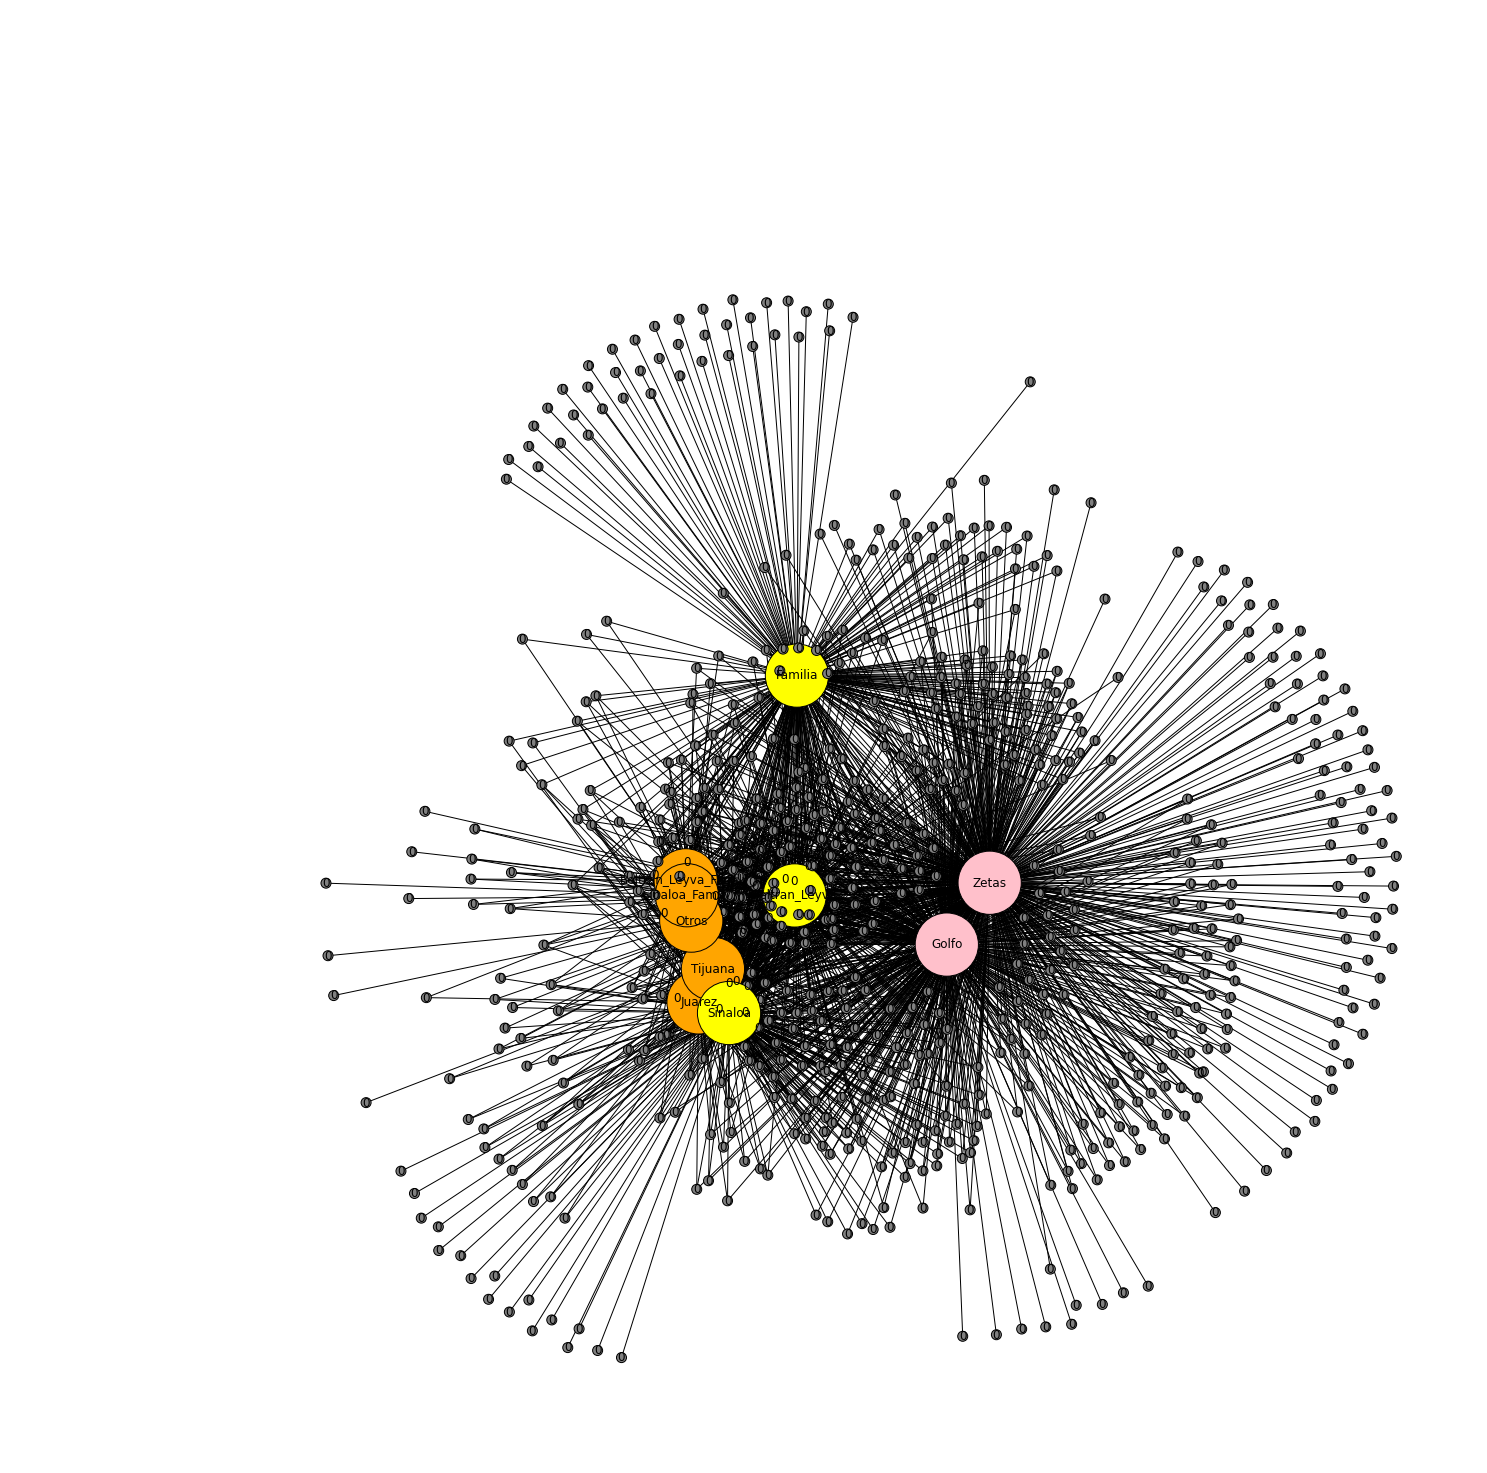

In [205]:
color_map = []
sizes = []
labels = {}
for node in G:
    if node in lat_1:
        color_map.append('yellow')
        sizes.append(4000)
        labels[node] = node
    elif node in lat_2:
        color_map.append('orange')
        sizes.append(4000)
        labels[node] = node
    elif node in lat_3:
        color_map.append('pink')
        sizes.append(4000)
        labels[node] = node
    else:
        color_map.append('grey')
        sizes.append(100)
        labels[node] = 0
        
plt.figure(figsize=(20,20))    
nx.draw(G,node_color = color_map,node_size=sizes,labels=labels,with_labels=True)
plt.show()